## Manipulação de Dados

In [41]:
# Importando as bibliotecas necessárias

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [42]:
# Importando a base de dados e verificando sua estrutura
# Leitura no Macbook
df = pd.read_csv("/Users/MacEnzo/Desktop/House_Pricing_ML/data/house_prices.csv")

In [43]:
# Verificando as informações da base de dados como contagem de valores e tipo de colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  object 
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  object 
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [60]:
# Verificando os valores nulos
df.isna().sum()

id                     0
price                  0
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
waterfront             0
view                   0
grade                  0
sqft_above             0
sqft_basement          0
yr_built               0
yr_renovated           0
zipcode                0
lat                    0
long                   0
sqft_living15          0
sqft_lot15             0
year                   0
month                  0
day                    0
condition_Average      0
condition_Fair         0
condition_Good         0
condition_Poor         0
condition_Very Good    0
dtype: int64

In [44]:
# Criando uma coluna para cada parte da data (ano, mês e dia) e excluindo a coluna original

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df.drop("date", axis=1, inplace=True)

In [45]:
# Verificando os valores únicos da coluna "condition"
df["condition"].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [46]:
# Transformando os 5 valores únicos da coluna para colunas próprias utilizando dummies
df = pd.get_dummies(df, columns=["condition"], dtype="int")

In [47]:
# Verificando os valores únicos da coluna "waterfront"
df["waterfront"].unique()

array(['N', 'Y'], dtype=object)

In [48]:
# Substituindo os valores "N" para 0 e "Y" para 1
df["waterfront"] = df["waterfront"].replace(["N", "Y"], [0, 1])


/var/folders/7d/bsg2h_vs7t11dqc8789wpwhm0000gn/T/ipykernel_681/3843686996.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["waterfront"] = df["waterfront"].replace(["N", "Y"], [0, 1])


In [49]:
# Verificando o resultado da manipulação de dados feita até o momento
pd.set_option('display.float_format', '{:,.0f}'.format) # Sem casas decimais e com separador de milhar

# Olhando o resultado pela amostra das primeiras 5 linhas
df.head().T

,0,1,2,3,4
id,"7,129,300,520","6,414,100,192","5,631,500,400","2,487,200,875","1,954,400,510"
price,"221,900","538,000","180,000","604,000","510,000"
bedrooms,3,3,2,4,3
bathrooms,1,2,1,3,2
sqft_living,"1,180","2,570",770,"1,960","1,680"
sqft_lot,"5,650","7,242","10,000","5,000","8,080"
floors,1,2,1,1,1
waterfront,0,0,0,0,0
view,0,0,0,0,0
grade,7,7,6,7,8


In [50]:
# Verificando novamente as informações da base, agora para verificar somente os tipos de dados de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   21613 non-null  int64  
 1   price                21613 non-null  float64
 2   bedrooms             21613 non-null  int64  
 3   bathrooms            21613 non-null  float64
 4   sqft_living          21613 non-null  int64  
 5   sqft_lot             21613 non-null  int64  
 6   floors               21613 non-null  float64
 7   waterfront           21613 non-null  int64  
 8   view                 21613 non-null  int64  
 9   grade                21613 non-null  int64  
 10  sqft_above           21613 non-null  int64  
 11  sqft_basement        21613 non-null  int64  
 12  yr_built             21613 non-null  int64  
 13  yr_renovated         21613 non-null  int64  
 14  zipcode              21613 non-null  int64  
 15  lat                  21613 non-null 

## Análise exploratória dos dados

In [51]:
# Fazendo análise estatística de distribuição das variáveis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,"21,613","4,580,301,521","2,876,565,571","1,000,102","2,123,049,194","3,904,930,410","7,308,900,445","9,900,000,190"
price,"21,613","540,088","367,127","75,000","321,950","450,000","645,000","7,700,000"
bedrooms,"21,613",3,1,0,3,3,4,33
bathrooms,"21,613",2,1,0,2,2,2,8
sqft_living,"21,613","2,080",918,290,"1,427","1,910","2,550","13,540"
sqft_lot,"21,613","15,107","41,421",520,"5,040","7,618","10,688","1,651,359"
floors,"21,613",1,1,1,1,2,2,4
waterfront,"21,613",0,0,0,0,0,0,1
view,"21,613",0,1,0,0,0,0,4
grade,"21,613",8,1,1,7,7,8,13


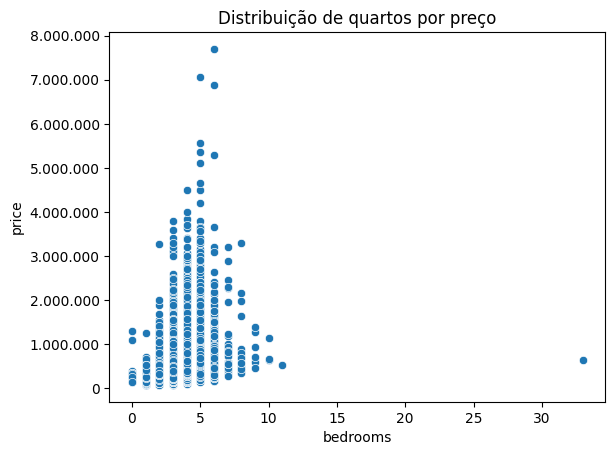

In [52]:
# Gráfico de preço por quantidade de quartos
ax = sns.scatterplot(data=df, x='bedrooms', y='price')
plt.title('Distribuição de quartos por preço')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Mostrar o gráfico
plt.show()


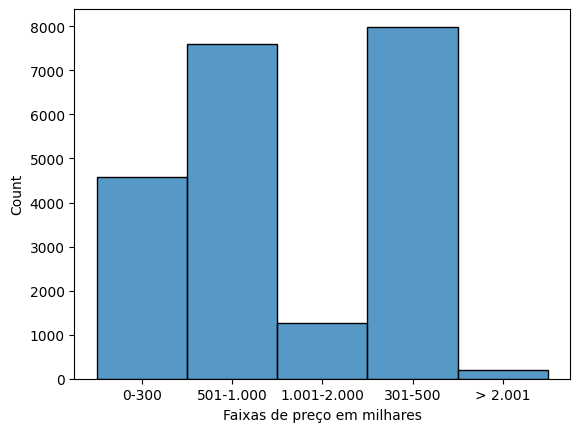

In [53]:
# Distribuição de preços
# Criando faixas de preço para criação do gráfico
def categorizar_preco(x):
    if x <= 300000:
        return "0-300"
    elif x >300000 and x <= 500000:
        return "301-500"
    elif x >500000 and x <= 1000000:
        return "501-1.000"
    elif x >1000000 and x <= 2000000:
        return "1.001-2.000"
    elif x > 2000000:
        return "> 2.001"
df['faixas'] = df['price'].apply(categorizar_preco)

ax = sns.histplot(data=df, x='faixas')
plt.xlabel("Faixas de preço em milhares")
# Formatar o eixo X para mostrar números inteiros sem notação científica
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

plt.show()

df.drop("faixas", axis=1, inplace=True)

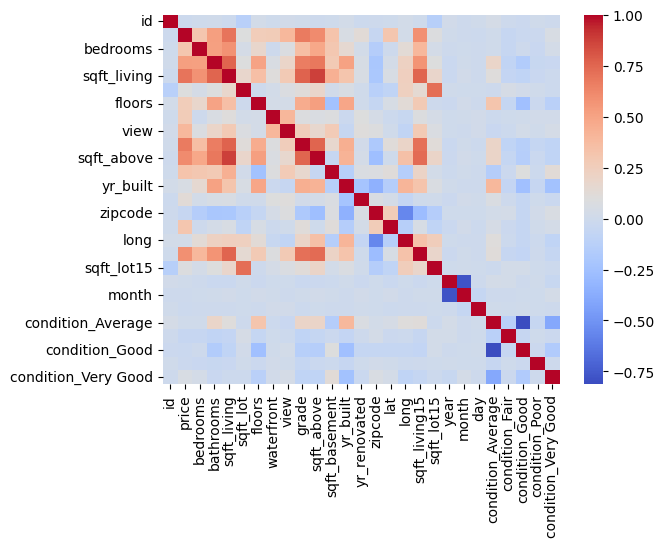

In [54]:
# Mapa de calor mostrando a correlação entre as variáveis
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.show()

## Modelo de Machine Learning

In [55]:
# Regressão Linear vs Rede Neural
# Importando bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
# Preparando os dados para inserção no modelo
# Separando em X e y
X = df.drop('price', axis=1)
y = df[['price']]

# Dividindo em 80% para treinamento e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

# Normalizando os dados com MinMaxScaler
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)


In [57]:
# Regressão Linear

# Criando o modelo
model  = LinearRegression()

# Treinando o modelo
model.fit(X_train_scaled, y_train_scaled)

# Criando a variável para guardar os valores preditos do modelo treinado
y_pred = model.predict(X_test_scaled)

# Avaliando o modelo com R2, MSE e RMSE
r2 = r2_score(y_test_scaled, y_pred)
print(f"R2 Score: {r2:.4f}")

mse = mean_squared_error(y_test_scaled, y_pred)
print(f"Mean squared error: {mse:.4f}")

rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")


R2 Score: 0.7031
Mean squared error: 0.0008
Root mean squared error: 0.0278


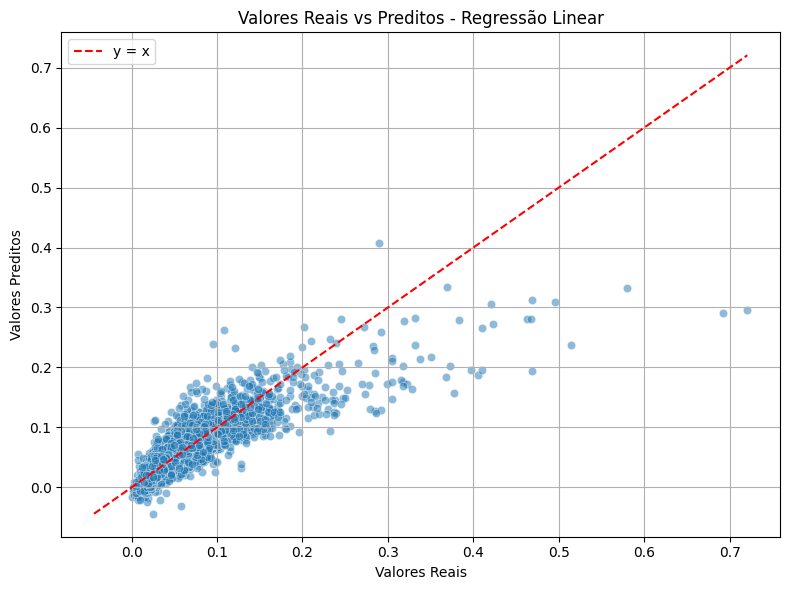

In [58]:
# Deixando as varíaveis de y real e preditas com somente uma dimensão, podendo criar gráficos
y_pred_1d = y_pred.reshape(-1)
y_test_scaled_1d = y_test_scaled.reshape(-1)

# Gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_scaled_1d, y=y_pred_1d, alpha=0.5)

# Linha de identidade (y = x)
min_val = min(y_test_scaled_1d.min(), y_pred_1d.min())
max_val = max(y_test_scaled_1d.max(), y_pred_1d.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x')

plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Valores Reais vs Preditos - Regressão Linear")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

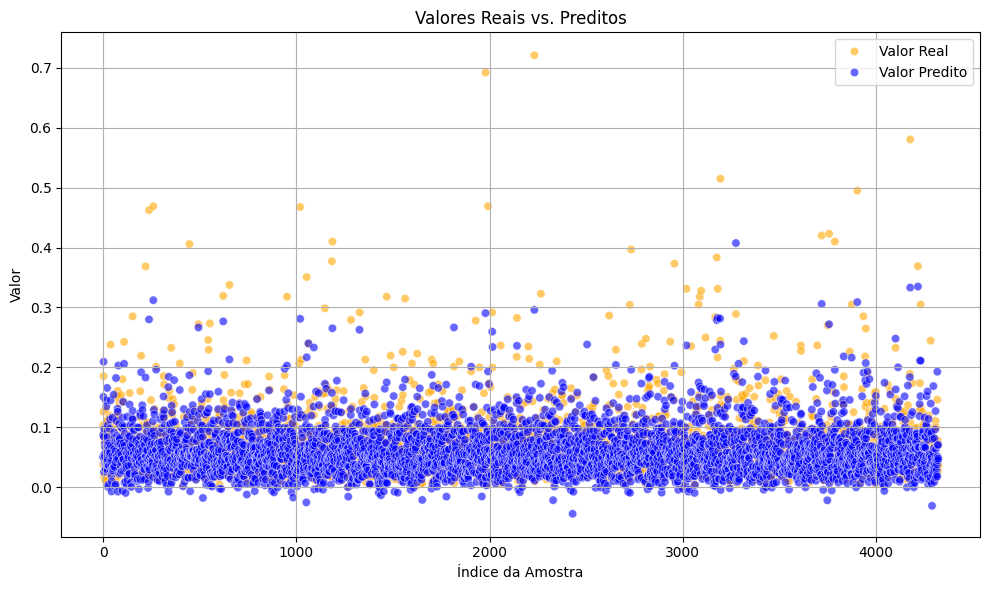

In [59]:

# Índice das amostras (eixo X)
x = np.arange(len(y_test_scaled_1d))

# Criando DataFrame para criação de outro gráfico
df_plot = pd.DataFrame({
    'Índice': np.concatenate([x, x]),
    'Valor': np.concatenate([y_test_scaled_1d, y_pred_1d]),
    'Tipo': ['Valor Real'] * len(x) + ['Valor Predito'] * len(x)
})

# Gráfico com seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='Índice', y='Valor', hue='Tipo',
                palette={'Valor Real': 'orange', 'Valor Predito': 'blue'},
                alpha=0.6)

plt.title("Valores Reais vs. Preditos")
plt.xlabel("Índice da Amostra")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
